In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank_data.csv')

In [3]:
df.size

11292

**GRAPHICAL EXPORATORY DATA ANALYSIS**

In [4]:
df1 = df[df['expected_recovery_amount']<=3000]

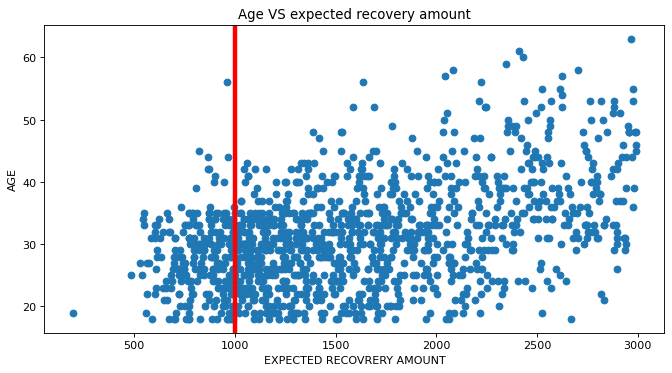

In [5]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(df1['expected_recovery_amount'], df1['age'])
plt.xlabel('EXPECTED RECOVRERY AMOUNT')
plt.ylabel('AGE')
plt.title("Age VS expected recovery amount")
plt.axvline(x=1000, color='red', linewidth=4)

**STATISTICAL TEST**

***i) AGE vs EXPECTED RECOVERY AMOUNT***

In [6]:
df2 = df.loc[(df['expected_recovery_amount']>=900) & (df['expected_recovery_amount']<=1000)]['age']
df3 = df.loc[(df['expected_recovery_amount']>1000) & (df['expected_recovery_amount']<=1100)]['age']
stats.kruskal(df2,df3)

KruskalResult(statistic=3.1513987711538896, pvalue=0.07586190694799404)

***ii) SEX vs EXPECTED RECOVERY AMOUNT***

In [7]:
df4 = df.loc[(df['expected_recovery_amount']>=900) & (df['expected_recovery_amount']<=1000)]['sex']
df5 = df.loc[(df['expected_recovery_amount']>1000) & (df['expected_recovery_amount']<=1100)]['sex']
stats.kruskal(df4,df5)

KruskalResult(statistic=0.7257610317930727, pvalue=0.39426066340141885)

**EXPLORATORY GRAPHICAL ANALYSIS: RECOVERY AMOUNT**

In [8]:
df6 = df.loc[(df['expected_recovery_amount']>= 900) & (df['expected_recovery_amount']<=1100)]


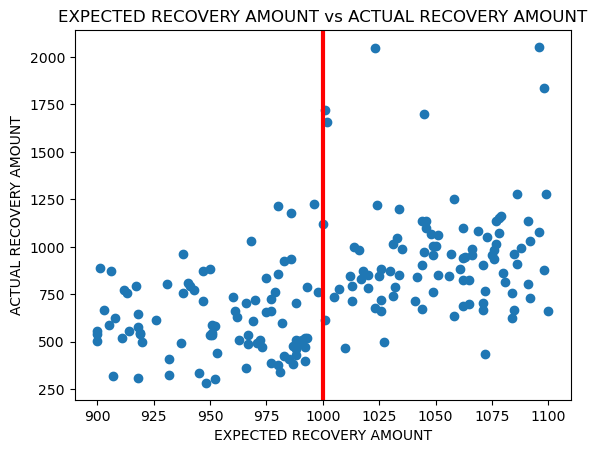

In [9]:
plt.scatter(df6['expected_recovery_amount'],df6['actual_recovery_amount'] )
plt.xlabel('EXPECTED RECOVERY AMOUNT')
plt.ylabel('ACTUAL RECOVERY AMOUNT')
plt.title('EXPECTED RECOVERY AMOUNT vs ACTUAL RECOVERY AMOUNT')
plt.axvline(x=1000, color='red', linewidth =3)

**STATISTICAL ANALYSIS: RECOVERY AMOUNT**

In [10]:
df7 = df.loc[(df['expected_recovery_amount']>= 900) & (df['expected_recovery_amount']<=1000)]['actual_recovery_amount']
df8 = df.loc[(df['expected_recovery_amount']> 1000)& (df['expected_recovery_amount']<=1100)]['actual_recovery_amount']
df9 = df.loc[(df['expected_recovery_amount']> 950)& (df['expected_recovery_amount']<=1000)]['actual_recovery_amount']
df10 = df.loc[(df['expected_recovery_amount']> 1000)& (df['expected_recovery_amount']<=1050)]['actual_recovery_amount']

In [11]:
stats.kruskal(df7, df8)

KruskalResult(statistic=64.89840778685254, pvalue=7.886077128395961e-16)

In [12]:
stats.kruskal(df9, df10)

KruskalResult(statistic=31.358122101518347, pvalue=2.1455923302407057e-08)

**REGRESSION MODELLING: NO THRESHOLD**

In [13]:
df[['actual_recovery_amount', 'expected_recovery_amount']].corr().iloc[-1][0]

0.9037269769221351

In [14]:
model1 = LinearRegression()
X=df6[['expected_recovery_amount']]
y=df6['actual_recovery_amount']

In [15]:
model1.fit(X,y)
predictions1 = model1.predict(X)
print('INTERCEPT:',model1.intercept_)
print('CO-EF:', model1.coef_)

INTERCEPT: -1918.4549425253624
CO-EF: [2.69559985]


In [16]:
adj_r_sq_model1 = 1 - ( 1-model1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print('ADJUSTED R-SQUARED OF MODEL-1 = ', adj_r_sq_model1)

ADJUSTED R-SQUARED OF MODEL-1 =  0.2483944772369876


**REGRESSION MODELLING: ADDING TRUE THRESHOLD**

In [17]:
X = df6[['expected_recovery_amount']]
y = df6['actual_recovery_amount']
X.loc[X['expected_recovery_amount'] < 1000, 'indicator_1000'] = 0
X.loc[X['expected_recovery_amount'] >= 1000, 'indicator_1000'] = 1

In [18]:
model2 = LinearRegression()
model2.fit(X,y)
predictions2 = model2.predict(X)

In [19]:
print('INTERCEPT:',model2.intercept_)
print('CO-EF:', model2.coef_)

INTERCEPT: 98.82715613426114
CO-EF: [  0.54299719 284.02963305]


In [20]:
adj_r_sq_model2 = 1 - ( 1-model2.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print('ADJUSTED R-SQUARED OF MODEL-2 = ', adj_r_sq_model2)

ADJUSTED R-SQUARED OF MODEL-2 =  0.3011429586019825


**REGRESSION MODELLING: ADJUSTING THE WINDOW**

In [21]:
df11 = df[(df['expected_recovery_amount']>=950) & (df['expected_recovery_amount']<=1050)]

In [22]:
X = df11[['expected_recovery_amount']]
y = df11['actual_recovery_amount']
X.loc[X['expected_recovery_amount'] < 1000, 'indicator_1000'] = 0
X.loc[X['expected_recovery_amount'] >= 1000, 'indicator_1000'] = 1

In [23]:
model3 = LinearRegression()
model3.fit(X,y)
predictions3 = model3.predict(X)

In [24]:
print('INTERCEPT:',model3.intercept_)
print('CO-EF:', model3.coef_)

INTERCEPT: -310.82249228731985
CO-EF: [  0.95101379 285.51597967]


In [25]:
adj_r_sq_model3 = 1 - ( 1-model3.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print('ADJUSTED R-SQUARED OF MODEL-3 = ', adj_r_sq_model3)

ADJUSTED R-SQUARED OF MODEL-3 =  0.27263723947550533
